# **Caricamento dataset preprocessato**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/dataset_clean.csv')
print(df.head())

   id        title                                               body  \
0   1      urgente  Desidero segnalare che richiesta maternità Gra...   
1   2        ferie       nota spese da approvare thx era solo un'idea   
2   3     password  Buongiorno, internet non funziona Grazie per l...   
3   4  problema pc                                  schermo sfarfalla   
4   5    richiesta  gli straordinari non sono stati pagati inoltre...   

          category priority                                          full_text  
0  Amministrazione     alta  urgente desidero segnalare che richiesta mater...  
1  Amministrazione    bassa  ferie nota spese da approvare thx era solo un'...  
2          Tecnico    media  password buongiorno internet non funziona graz...  
3          Tecnico     alta                      problema pc schermo sfarfalla  
4  Amministrazione     alta  richiesta gli straordinari non sono stati paga...  


# **Definizione delle variabili X e y**

**Feature (variabile di input)**

In [3]:
X = df["full_text"]

**Target (variabile da predire)**

In [4]:
y_priority = df["priority"]

# **Train-test split**

**Importazione della libreria per la suddivisione del dataset**

In [5]:
from sklearn.model_selection import train_test_split

**Suddivisione del dataset in training e test set**

In [6]:
X_train_prio, X_test_prio, y_train_prio, y_test_prio = train_test_split(X, y_priority, test_size=0.2, random_state=42, stratify=y_priority)

# **TF-IDF + NLTK**

**Importazione delle librerie per la vettorizzazione del testo, pesando maggiormente le parole più rare e penalizzando quelle più comuni (TF-IDF), e per rimuovere tramite NLTK le parole non influenti (stopwords) come articoli, congiunzioni e preposizioni**


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

italian_stopwords = stopwords.words('italian')

vectorizer = TfidfVectorizer(stop_words=italian_stopwords, ngram_range=(1,2), min_df=2, max_df=0.9)

X_train_prio_tfidf = vectorizer.fit_transform(X_train_prio)
X_test_prio_tfidf = vectorizer.transform(X_test_prio)



# **Allenamento di un modello SVM lineare**

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

svm_linear_model_prio = LinearSVC(random_state=42, class_weight='balanced')
svm_linear_model_prio.fit(X_train_prio_tfidf, y_train_prio)
y_pred_prio_linear = svm_linear_model_prio.predict(X_test_prio_tfidf)

accuracy_prio_linear = accuracy_score(y_test_prio, y_pred_prio_linear)
f1_prio_linear = f1_score(y_test_prio, y_pred_prio_linear, average='macro') 
cm_linear = confusion_matrix(y_test_prio, y_pred_prio_linear)
print("SVM Lineare - Priorità")
print("Accuracy:", accuracy_prio_linear)
print("F1 Score (Macro):", f1_prio_linear)
print("Confusion Matrix:\n", cm_linear)
print("\nClassification Report:\n", classification_report(y_test_prio, y_pred_prio_linear))

SVM Lineare - Priorità
Accuracy: 0.73
F1 Score (Macro): 0.7271334029954719
Confusion Matrix:
 [[48  4 10]
 [ 4 34 19]
 [ 2 15 64]]

Classification Report:
               precision    recall  f1-score   support

        alta       0.89      0.77      0.83        62
       bassa       0.64      0.60      0.62        57
       media       0.69      0.79      0.74        81

    accuracy                           0.73       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.74      0.73      0.73       200



# **Allenamento di un modello SVM RBF**

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

svm_rbf_model_prio = SVC(kernel='rbf', C=1, random_state=42, class_weight='balanced')
svm_rbf_model_prio.fit(X_train_prio_tfidf, y_train_prio)
y_pred_prio_rbf = svm_rbf_model_prio.predict(X_test_prio_tfidf)

accuracy_prio_rbf = accuracy_score(y_test_prio, y_pred_prio_rbf)
f1_prio_rbf = f1_score(y_test_prio, y_pred_prio_rbf, average='macro')
cm_rbf = confusion_matrix(y_test_prio, y_pred_prio_rbf)   
print("SVM RBF - Priorità")
print("Accuracy:", accuracy_prio_rbf)
print("F1 Score (Macro):", f1_prio_rbf)
print("Confusion Matrix:\n", cm_rbf)
print("\nClassification Report:\n", classification_report(y_test_prio, y_pred_prio_rbf))

SVM RBF - Priorità
Accuracy: 0.65
F1 Score (Macro): 0.6406056342746123
Confusion Matrix:
 [[36  6 20]
 [ 6 30 21]
 [ 3 14 64]]

Classification Report:
               precision    recall  f1-score   support

        alta       0.80      0.58      0.67        62
       bassa       0.60      0.53      0.56        57
       media       0.61      0.79      0.69        81

    accuracy                           0.65       200
   macro avg       0.67      0.63      0.64       200
weighted avg       0.67      0.65      0.65       200



# **Allenamento di un modello basato su rete neurale**

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

mlp_model_prio = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model_prio.fit(X_train_prio_tfidf, y_train_prio)
y_pred_prio_mlp = mlp_model_prio.predict(X_test_prio_tfidf)

accuracy_prio_mlp = accuracy_score(y_test_prio, y_pred_prio_mlp)
f1_prio_mlp = f1_score(y_test_prio, y_pred_prio_mlp, average='macro')
cm_mlp = confusion_matrix(y_test_prio, y_pred_prio_mlp)
print("MLP Classifier - Priorità")
print("Accuracy:", accuracy_prio_mlp)
print("F1 Score (Macro):", f1_prio_mlp)
print("Confusion Matrix:\n", cm_mlp)
print("\nClassification Report:\n", classification_report(y_test_prio, y_pred_prio_mlp))

MLP Classifier - Priorità
Accuracy: 0.69
F1 Score (Macro): 0.684805361192892
Confusion Matrix:
 [[46  4 12]
 [ 5 30 22]
 [ 3 16 62]]

Classification Report:
               precision    recall  f1-score   support

        alta       0.85      0.74      0.79        62
       bassa       0.60      0.53      0.56        57
       media       0.65      0.77      0.70        81

    accuracy                           0.69       200
   macro avg       0.70      0.68      0.68       200
weighted avg       0.70      0.69      0.69       200



# **Grafici di paragone tra i tre modelli**

In [11]:
results = {}
results['SVM Lineare'] = {'accuracy': accuracy_prio_linear, 'f1_score': f1_prio_linear, 'confusion_matrix': cm_linear}
results['SVM RBF'] = {'accuracy': accuracy_prio_rbf, 'f1_score': f1_prio_rbf, 'confusion_matrix': cm_rbf}
results['MLP Classifier'] = {'accuracy': accuracy_prio_mlp, 'f1_score': f1_prio_mlp, 'confusion_matrix': cm_mlp}

**Grafico a barre**

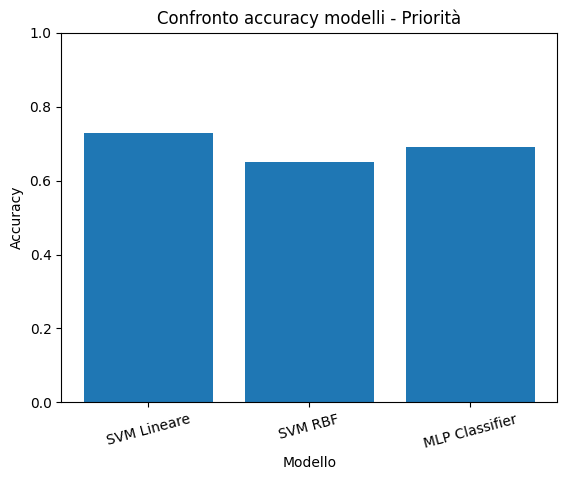

In [12]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure()
plt.bar(model_names, accuracies)
plt.title("Confronto accuracy modelli - Priorità")
plt.xlabel("Modello")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


**Matrice di confusione**

<Figure size 640x480 with 0 Axes>

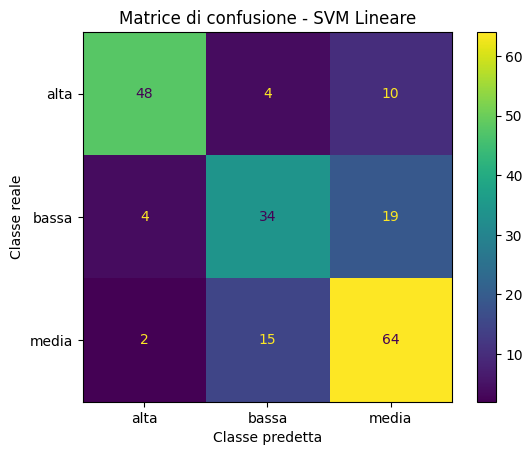

<Figure size 640x480 with 0 Axes>

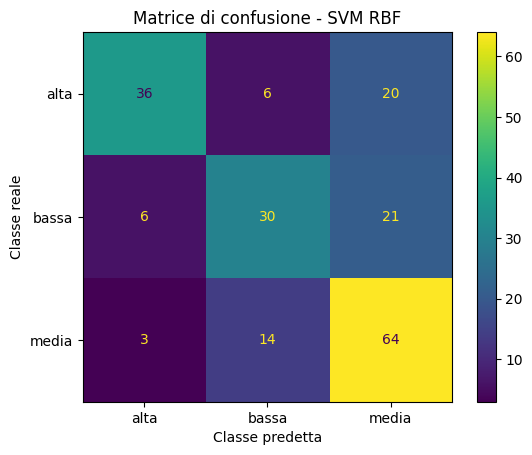

<Figure size 640x480 with 0 Axes>

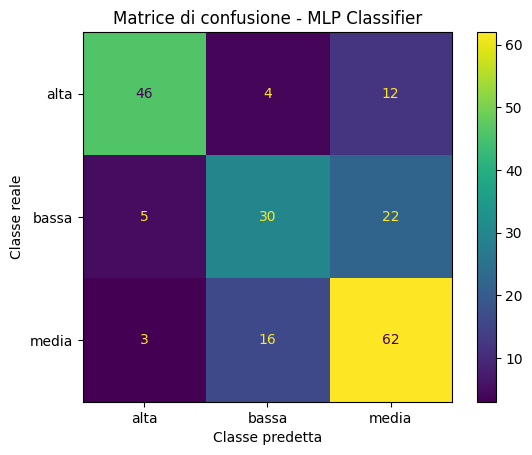

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

model_names = list(results.keys())

for model in model_names:
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=results[model]['confusion_matrix'], display_labels=svm_linear_model_prio.classes_)
    disp.plot()
    disp.ax_.set_xlabel("Classe predetta")
    disp.ax_.set_ylabel("Classe reale")
    plt.title(f"Matrice di confusione - {model}")
    plt.show()


# **Salvataggio modelli e vettorizzatore TF-IDF**

In [14]:
import joblib
from pathlib import Path

Path("models").mkdir(exist_ok=True)

joblib.dump(vectorizer, 'models/tfidf_priority.pkl')
joblib.dump(svm_linear_model_prio, 'models/svm_priority.pkl')
joblib.dump(svm_rbf_model_prio, 'models/svm_rbf_priority.pkl')
joblib.dump(mlp_model_prio, 'models/mlp_priority.pkl')

['models/mlp_priority.pkl']